In [ ]:
pip install -U yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.0 MB/s eta 0:00:00
   ━━━

# NMS (Non-Maximum Suppression) o Supresión No Máxima es una técnica crucial en la detección de objetos que se utiliza para refinar los resultados y mejorar la precisión. Su función principal es filtrar los cuadros delimitadores superpuestos que predicen el mismo objeto

El proceso de NMS generalmente implica los siguientes pasos:

Evalúa la Intersección sobre Unión (IoU) entre cuadros delimitadores.

Considera las puntuaciones de confianza asociadas a cada detección.

Elimina las detecciones redundantes, manteniendo solo el cuadro delimitador con la puntuación más alta para cada objeto.

Esta técnica es fundamental en modelos de detección de objetos como YOLO (You Only Look Once), donde ayuda a:

Reducir falsos positivos

Mejorar la interpretabilidad de los resultados

Garantizar que cada objeto se detecte solo una vez

In [ ]:
import yolov5
model = yolov5.load('keremberke/yolov5m-license-plate')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/42.1M [00:00<?, ?B/s]

In [ ]:
import cv2  #Procesamiento de imágenes y visión por computadora.
import torch #Biblioteca de aprendizaje profundo.
from google.colab.patches import cv2_imshow #Función de Google Colab para mostrar imágenes
from IPython.display import display, Image #Funciones de IPython para mostrar contenido en notebooks

def detect_license_plates(image_path):
    # Leer la imagen
    img = cv2.imread(image_path)

    # Convertir a RGB si es en escala de grises
    if len(img.shape) == 2 or img.shape[2] == 1:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Configuración de los parámetros del modelo de detección de objetos
    model.conf = 0.25 #Detecciones con confianza menor a 0.25 serán descartadas.
    model.iou = 0.45 #Umbral de Intersección sobre Unión para la supresión de no máximos
    model.agnostic = False #La supresión de no máximos considerará las clases.
    model.multi_label = False #Cada objeto solo tendrá una etiqueta
    model.max_det = 1000 #Número máximo de detecciones permitidas

    # Procesamiento de la imagen
    with torch.amp.autocast("cuda", enabled=True):
        results = model(img, size=640) #La imagen se pasa al modelo, redimensionándola a 640x640 píxeles

    # Extracción de predicciones
    predictions = results.pred[0] #Se extraen las predicciones del primer (y único) lote
    boxes = predictions[:, :4] #Coordenadas de las cajas delimitadoras (x1, y1, x2, y2)
    scores = predictions[:, 4] #Puntuaciones de confianza para cada detección.
    categories = predictions[:, 5] #Índices de las categorías predichas

    # Dibujar las detecciones en la imagen
    img_with_boxes = results.render()[0] #Se genera una imagen con las detecciones dibujadas

    # Mostrar la imagen con las detecciones
    cv2_imshow(img_with_boxes)

    return boxes, scores, categories

/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


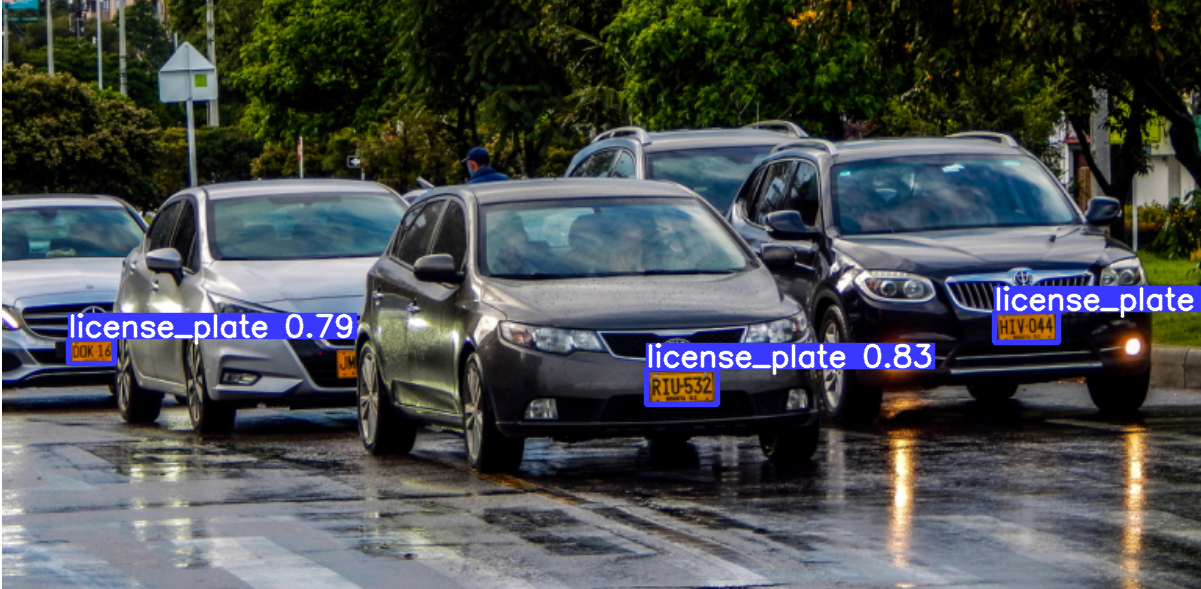

Detecciones en imagen a color:
Cajas: tensor([[ 646.17847,  368.15417,  717.81989,  404.85605],
        [  68.72657,  338.23984,  114.49625,  363.90179],
        [ 994.81580,  311.01523, 1058.24695,  342.17557]])
Puntuaciones: tensor([0.83216, 0.79044, 0.77950])
Categorías: tensor([0., 0., 0.])


In [ ]:
# Ejemplo de uso:
boxes, scores, categories = detect_license_plates('7.png')  # Imagen a color
print("Detecciones en imagen a color:")
print("Cajas:", boxes)
print("Puntuaciones:", scores)
print("Categorías:", categories)


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


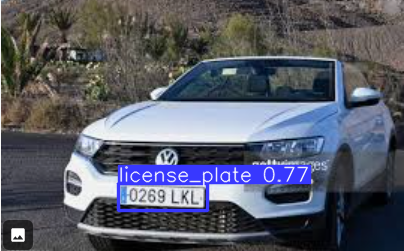

Detecciones en imagen a color:
Cajas: tensor([[118.86549, 183.48648, 207.24088, 210.00835]])
Puntuaciones: tensor([0.76756])
Categorías: tensor([0.])


In [ ]:
# Ejemplo de uso:
boxes, scores, categories = detect_license_plates('8.png')  # Imagen a color
print("Detecciones en imagen a color:")
print("Cajas:", boxes)
print("Puntuaciones:", scores)
print("Categorías:", categories)

/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


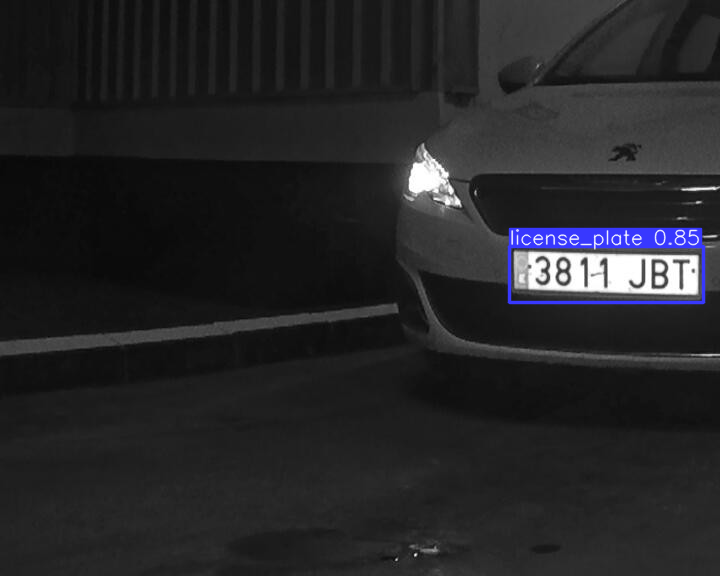


Detecciones en imagen en blanco y negro:
Cajas: tensor([[509.05737, 246.84155, 703.98425, 302.02618]])
Puntuaciones: tensor([0.84509])
Categorías: tensor([0.])


In [ ]:
boxes, scores, categories = detect_license_plates('9.jpg')  # Imagen blanco y negro
print("\nDetecciones en imagen en blanco y negro:")
print("Cajas:", boxes)
print("Puntuaciones:", scores)
print("Categorías:", categories)

/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


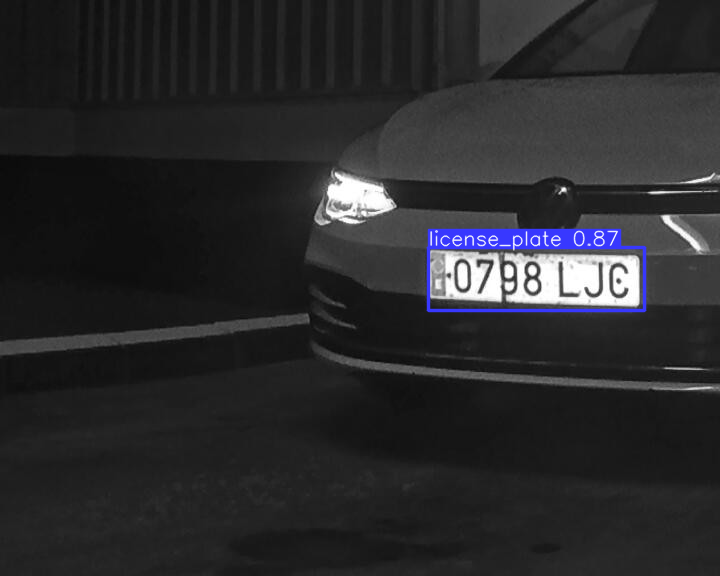

Detecciones en imagen a color:
Cajas: tensor([[428.67270, 247.31793, 644.33594, 310.71234]])
Puntuaciones: tensor([0.86502])
Categorías: tensor([0.])


In [ ]:
boxes, scores, categories = detect_license_plates('10.jpg')  # Imagen blanco y negro
print("Detecciones en imagen a color:")
print("Cajas:", boxes)
print("Puntuaciones:", scores)
print("Categorías:", categories)

# IMPLEMENTACION SOLICITANDO IMAGENES

In [ ]:
import torch
from google.colab import files
import cv2
import numpy as np
from IPython.display import display, Image
from google.colab.patches import cv2_imshow

def load_and_configure_model():
    model = yolov5.load('keremberke/yolov5m-license-plate')
    model.conf = 0.25
    model.iou = 0.45
    model.agnostic = False
    model.multi_label = False
    model.max_det = 1000
    return model

def process_image(img_array, model):
    results = model(img_array)
    return results

def display_results(img_array, results):
    img = results.render()[0]
    cv2_imshow(img)

# Cargar y configurar el modelo
model = load_and_configure_model()

while True:
    user_input = input("¿Deseas procesar una imagen? (s/n): ").lower()
    if user_input != 's':
        break

    print("Por favor, sube una imagen.")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"Procesando {filename}...")

        # Leer la imagen
        file_bytes = np.asarray(bytearray(uploaded[filename]), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

        # Procesar la imagen
        results = process_image(img, model)

        # Mostrar resultados
        display_results(img, results)

        # Imprimir número de detecciones
        num_detections = len(results.pred[0])
        print(f"Se detectaron {num_detections} placas de matrícula.")

print("¡Gracias por usar el detector de placas de matrícula!")

¿Deseas procesar una imagen? (s/n): n
¡Gracias por usar el detector de placas de matrícula!


# Comando para entrenar (fine-tuning) el modelo YOLOv5 en un conjunto de datos personalizado. Aquí están los parámetros:

--data data.yaml: Especifica el archivo de configuración del conjunto de datos.

--img 640: Establece el tamaño de la imagen de entrada a 640x640 píxeles.

--batch 16: Define el tamaño del lote (batch size) para el entrenamiento.

--weights keremberke/yolov5m-license-plate: Utiliza los pesos pre-entrenados de un modelo específico para placas de matrícula.

--epochs 10: Establece el número de épocas de entrenamiento a 10.

In [ ]:
#Para ajustar el modelo en un conjunto de datos personalizado:
#yolov5 train --data data.yaml --img 640 --batch 16 --weights keremberke/yolov5m-license-plate --epochs 10
